Modified from HW6
The goal of this code is to simulate the merger of The Milky Way(MW) and Andromeda(M31) galaxies using provided data.
The output will show a 3D distribution of the disk particles for MW and M31 in a scatter plot. The different galaxies will be represented with different symbols and colors:
MW: 'o', blue
M31: '^', red

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#using notebook as opposed to inline in order to manipulate the output
%matplotlib notebook 

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass

In [ ]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
            galaxy: name of the galaxy
            start: the number of the first snapshot to be read in 
            end: the number of theast snapshot to be read in
            n: an integer indicating the intervals over which you will return the COM
    returns: 
            
    """
    
    # compose the filename for output
    fileout = 'Orbit_'+galaxy+'.txt'
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    delta = 0.1
    if galaxy=='M33':
        VolDec = 4
    else: 
        VolDec = 2
    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    snap_ids = np.arange(start,end,n)
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([len(snap_ids), 7])
    
    # a for loop 
    for  i, snap_id in enumerate(snap_ids):
        # compose the data filename 
        # add a string of the filename to the value '000'
        ilbl = '000' + str(snap_id)
        # remove all but the last 3 digits
        ilbl = ilbl[-3:]
        filename = "%s_"%(galaxy) + ilbl + '.txt'
        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(filename,2)
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COMP = COM.COM_P(delta,VolDec)
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        COMV = COM.COM_V(*COMP)
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        t = COM.time.value/1000
        COMP = COMP.value
        COMV = COMV.value
        orbit[i] = t,*tuple(COMP),*tuple(COMV)
        # print snap_id to see the progress
        print(snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, header='time x y z vx vy vz', comments='#',\
               fmt=['%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f'])

In [ ]:
OrbitCOM('M33',0,800,5)
OrbitCOM('M31',0,800,5)
OrbitCOM('MW',0,800,5)

In [ ]:
#Define a function to store the positional values for a given galaxy
def Positions(galaxy):
    #Inputs:
        #galaxy: the name of the galaxy for which the values are stored
    #Return:
        #An array of the positional values (x, y, z)
    data = np.genfromtxt('Orbit_'+galaxy+'.txt', names = True)
    x = data['x']
    y = data['y']
    z = data['z']
    return np.array([x,y,z])

In [ ]:
#Define a function to store the velocity values of a given galaxy
def Velocities(galaxy):
    #Inputs:
        #galaxy: the name of the galaxy for which the values are stored
    #Return:
        #An array of velocity values, (vx, vy, vz)
    data = np.genfromtxt('Orbit_'+galaxy+'.txt', names = True)
    vx = data['vx']
    vy = data['vy']
    vz = data['vz']
    return np.array([vx,vy,vz])

In [ ]:
#Define a function to find the difference between two vectors
def MagDiff(V1,V2):
   #Inputs:
            #V1: Vector 1 
            #V2: Vector 2
   #Returns: 
            #The normalized difference between two vectors
    return np.linalg.norm(V2-V1, axis=0)

In [ ]:
MW_Pos, MW_Vel = Positions('MW'), Velocities('MW')
M31_Pos, M31_Vel = Positions('M31'), Velocities('M31')
M33_Pos, M33_Vel = Positions('M33'), Velocities('M33')
MW_M31_Pos = MagDiff(MW_Pos,M31_Pos)
MW_M31_Vel = MagDiff(MW_Vel,M31_Vel)
M31_M33_Pos = MagDiff(M31_Pos,M33_Pos)
M31_M33_Vel = MagDiff(M31_Vel,M33_Vel)

In [ ]:
fig,ax = plt.subplots(nrows = 2, ncols = 2, sharex = 'all', sharey = 'all', figsize = (15,10))
#Plot the positional separation between MW and M31
ax[0,0].set_title('MW M31 Separation')
ax[0,0].set_ylabel('Log(Distance) (kpc)')
ax[0,0].set_xlabel('Time(Gyr)')
ax[0,0].plot(MW_M31_Pos)
ax[0,0].set(yscale='log')
#Plot the velocity of MW and M31
ax[1,0].plot(MW_M31_Vel)
ax[1,0].set(yscale='log')
ax[1,0].set_title('MW M31 Velocity')
ax[1,0].set_ylabel('Log(Velocity) (km/s)')
ax[1,0].set_xlabel('Time(Gyr)')
#Plot the positional separtation between M31 and M31
ax[0,1].plot(M31_M33_Pos)
ax[0,1].set_title('M31 M33 Separation')
ax[0,1].set_ylabel('Log(Distance) (kpc)')
ax[0,1].set(yscale='log')
ax[0,1].set_xlabel('Time(Gyr)')
#Plot the velocity between M31 and M33
ax[1,1].plot(M31_M33_Vel)
ax[1,1].set_title('MW M31 Velocity')
ax[1,1].set(yscale='log')
ax[1,1].set_ylabel('Log(Velocity) (km/s)')
ax[1,1].set_xlabel('Time(Gyr)')

(0.29, -2.46, 3.79, -1.61, -4.33, 8.17, -0.19)


<IPython.core.display.Javascript object>


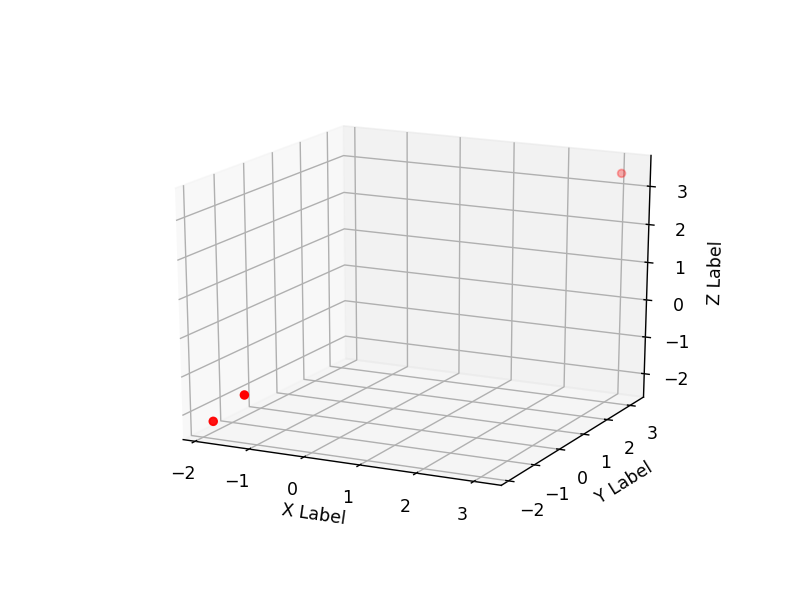

[-1.86  3.11 -1.46]


In [12]:
#Plot the disk remnants of the MW/M31 merger
#Read in files generated using OrbitCOM function
filename1 = 'Orbit_MW.txt'
filename2 = 'Orbit_M31.txt'

#Generate data from each of the files, important data includes the [x,y,z] positions for each star from each galaxy
data1 = np.genfromtxt(filename1,dtype=None,names=True,skip_header=3)
data2 = np.genfromtxt(filename2,dtype=None,names=True,skip_header=3)
print(data1[1])
#Create a 3D scatter plot with each 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Orbit = np.genfromtxt('Orbit_MW.txt')
print(Orbit[1,1:-3])
#Slices the data in order to isolate the positional data for each line
ax.scatter(Orbit[1,1:-3], Orbit[2,1:-3], Orbit[3,1:-3], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()